Проанализировав совершенные покупки нужно ответить на следующие вопросы:
1. Сколько у пользователей, которые совершили покупку только один раз? 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам? 

3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

5. 1) Выполнить когортный анализ пользователей.
2) В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц. 

6. Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

In [110]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Сколько пользователей, которые совершили покупку только один раз? 

In [111]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-li-kim/project_variant1/olist_orders_dataset.csv'

In [112]:
orders = pd.read_csv(
    path_to_file,
    parse_dates=[
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)

In [113]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [114]:
orders.groupby('order_status').nunique()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,483,74,6,289
created,5,5,5,0,0,0,5
delivered,96478,96478,95956,88274,80106,95658,445
invoiced,314,314,314,314,0,0,196
processing,301,301,301,301,0,0,182
shipped,1107,1107,1106,1104,1104,0,344
unavailable,609,609,607,607,0,0,263


In [115]:
path_to_file_2 = ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-li-kim/project_variant1/olist_customers_dataset.csv')

In [116]:
customers = pd.read_csv(path_to_file_2)

In [117]:
customers.customer_unique_id.nunique()

96096

In [118]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [119]:
merge_orders_and_customers = orders.merge(customers, how='left', on='customer_id')

In [120]:
merge_orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [121]:
orders_by_customers = (
    merge_orders_and_customers.query("order_status != ['cancelled', 'created']")
    .groupby(["customer_unique_id"], as_index=False)
    .agg({"order_id": "count"})
)

In [122]:
orders_by_customers.query("order_id == 1")

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96087,fffcf5a5ff07b0908bd4e2dbc735a684,1
96088,fffea47cd6d3cc0a88bd621562a9d061,1
96089,ffff371b4d645b6ecea244b27531430a,1
96090,ffff5962728ec6157033ef9805bacc48,1


*Импортирую таблицы с заказами и клиентами. Соединяю эти таблицы по 'customer_id'.
Затем фильтрую значения убирая из таблицы заказы со статусами 'cancelled' и 'created'. Так как заказы за со статусом 'cancelled'
 деньги вернуться клиенту и выручки от них не будет, а заказы со статусом 'created' так и не дошли до оплаты и зависли в этом 
статусе. Возможно клиент вообще забыл об этом заказе. Далее группирую данные по 'customer_unique_id' чтобы уникальных клиентов
и аггрегирую по 'order_id' чтобы посчитать количество заказов на каждого уникального клиента. Далее отбираю только тех клиентов
у кого 'order_id' == 1. Получаем, что клиентов сделавших только один заказ 93096*

#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [123]:
merge_orders_and_customers.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [124]:
orders.order_approved_at = orders.order_approved_at.dt.to_period("M")

In [125]:
orders.order_delivered_customer_date = orders.order_delivered_customer_date.fillna(0)

In [126]:
order_statuses_by_month_year = (
    orders.query("order_status != 'delivered'")
    .groupby(["order_status", "order_approved_at"], as_index=False)
    .agg({"order_id": "count"})
    .sort_values("order_approved_at")
)

In [127]:
order_statuses_by_month = order_statuses_by_month_year.groupby("order_status").agg({"order_id": "mean"})

In [128]:
order_statuses_by_month

,order_id
order_status,
approved,1.000000
canceled,23.047619
invoiced,14.952381
processing,15.842105
shipped,50.318182
unavailable,29.000000


*Если посмотреть у скольких заказов нет даты доставки, то есть их не доставили, то это число 2965. Из датафрейма 
'order_statuses_by_month' мы видим сколько в среднем заказов в месяц не доставлено с разными статусами. 
Это странно, потому что некоторые заказы были созданы в 2016-2017 годах, а отчет по таблице заканчивается в 2018 году.
То есть заказы годами стоят в статусах "approved", "invoiced", "processing", "shipped".
Я думаю что это ошибка либо системы, либо сбора данных. С такими данными затруднительно выяснить сколько заказов действительно
не было доставлено и истинную причину этого.*

#### 3 По каждому товару определить, в какой день недели товар чаще всего покупается.

In [129]:
path_to_file_3 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-li-kim/project_variant1/olist_order_items_dataset.csv'

In [130]:
order_items = pd.read_csv(path_to_file_3)

In [131]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [132]:
orders_and_items = orders.merge(order_items, on = 'order_id')

In [133]:
orders_and_items['order_approved_at'] = orders_and_items['order_approved_at'].astype(str)

In [134]:
orders_and_items['order_approved_at'] =  pd.to_datetime(orders_and_items['order_approved_at'])

In [135]:
orders_and_items['order_approved_at'] =  orders_and_items.order_approved_at.dt.day_name()

In [136]:
orders_and_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sunday,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Sunday,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Wednesday,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,Wednesday,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,Thursday,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,Thursday,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,Tuesday,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,Monday,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,Monday,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [137]:
orders_and_items.product_id.nunique()

32951

In [138]:
product_id_by_day = orders_and_items.groupby(
    ["order_approved_at", "product_id"], as_index=False
).agg({"order_status": "count"})

In [139]:
product_id_by_day.sort_values('order_status')

,order_approved_at,product_id,order_status
0,Friday,00088930e925c41fd95ebfe695fd2655,1
26062,Sunday,aaa09cd0acd316f7816145408dd73449,1
45314,Wednesday,0ea04fc101523a27bb53845d14d7d809,1
26064,Sunday,aac08ad85d954dfe44e572ad1012d4ed,1
26065,Sunday,aacedc250d7cd501e3edd7550aec2ed2,1
...,...,...,...
35235,Thursday,aca2eb7d00ea1a7b8ebd4e68314663af,107
42508,Tuesday,aca2eb7d00ea1a7b8ebd4e68314663af,109
31608,Thursday,3dd2a17168ec895c781a9191c1e95ad7,122
13157,Monday,aca2eb7d00ea1a7b8ebd4e68314663af,123


In [140]:
product_final = product_id_by_day.iloc[product_id_by_day.groupby(['product_id']).apply(lambda x: x['order_status'].idxmax())]

In [141]:
product_final = product_final.rename(columns= {'order_status': 'quantity', 'order_approved_at': 'week_day'})

In [142]:
product_final

,week_day,product_id,quantity
37998,Tuesday,00066f42aeeb9f3007548bb9d3f33c38,1
0,Friday,00088930e925c41fd95ebfe695fd2655,1
1,Friday,0009406fd7479715e4bef61dd91f2462,1
44708,Wednesday,000b8f95fcb9e0096488278317764d19,2
19183,Sunday,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...,...
9105,Friday,fff6177642830a9a94a0f2cba5e476d1,1
29603,Sunday,fff81cc3158d2725c0655ab9ba0f712c,1
29604,Sunday,fff9553ac224cec9d15d49f5a263411f,1
29605,Sunday,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


*Я преобразовала колонку 'order_approved_at' в дни недели. Затем посчитала количество каждого продукта сгруппировав данные по 
дням недели и 'product_id'. Затем оставила в таблице только дни c максимальным количеством покупок для каждого продукта. 
Таким образом сформировалась таблица product_final в которой мы видим в какой день недели каждый товар чаще всего покупается, 
а так же максимальное количество товара купленного в этот день.*

#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [143]:
customers_purchases = (
    merge_orders_and_customers.query("order_status != ['cancelled', 'created']")
    .groupby(
        [
            "customer_unique_id",
            "order_approved_at",
        ],
        as_index=False,
    )
    .agg({"order_id": "count"})
    .sort_values("order_id")
)

In [144]:
customers_purchases

,customer_unique_id,order_approved_at,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1
66124,aa5dd0967deea4691b54a5091db2206a,2018-05-10 10:32:51,1
66123,aa5dd0414c0e9ad24f22e06bec1dc805,2018-07-28 21:04:13,1
66122,aa5d6d18f850e370ea0c876268d71d68,2017-11-09 13:35:31,1
66121,aa5d1892e01f044ece40066386d02c14,2018-01-13 17:15:26,1
...,...,...,...
49433,7f4adf7903f4d02c527585c4d0f65c2e,2018-03-18 09:10:33,2
76448,c50794dfc62b62a84f72475abf38b4e3,2018-07-17 09:10:20,2
23085,3b6f5d22fb32e6ac2fbbb944b18cf1bb,2017-07-25 06:43:03,2
51224,83e7958a94bd7f74a9414d8782f87628,2017-01-07 03:44:23,2


In [145]:
customers_purchases['year'] = customers_purchases['order_approved_at'].dt.year

In [146]:
customers_purchases['month'] = customers_purchases['order_approved_at'].dt.month

In [147]:
customers_purchases['days_in_month'] = customers_purchases['order_approved_at'].dt.daysinmonth

In [148]:
customers_purchases

,customer_unique_id,order_approved_at,order_id,year,month,days_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,2018,5,31
66124,aa5dd0967deea4691b54a5091db2206a,2018-05-10 10:32:51,1,2018,5,31
66123,aa5dd0414c0e9ad24f22e06bec1dc805,2018-07-28 21:04:13,1,2018,7,31
66122,aa5d6d18f850e370ea0c876268d71d68,2017-11-09 13:35:31,1,2017,11,30
66121,aa5d1892e01f044ece40066386d02c14,2018-01-13 17:15:26,1,2018,1,31
...,...,...,...,...,...,...
49433,7f4adf7903f4d02c527585c4d0f65c2e,2018-03-18 09:10:33,2,2018,3,31
76448,c50794dfc62b62a84f72475abf38b4e3,2018-07-17 09:10:20,2,2018,7,31
23085,3b6f5d22fb32e6ac2fbbb944b18cf1bb,2017-07-25 06:43:03,2,2017,7,31
51224,83e7958a94bd7f74a9414d8782f87628,2017-01-07 03:44:23,2,2017,1,31


In [149]:
customers_purchases_mean_by_month = (
    customers_purchases.groupby(
        ["customer_unique_id", "year", "month", "days_in_month"], as_index=False
    )
    .agg({"order_id": "mean"})
    .sort_values("order_id")
)

In [150]:
customers_purchases_mean_by_month

,customer_unique_id,year,month,days_in_month,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,31,1.0
65266,aa5d6d18f850e370ea0c876268d71d68,2017,11,30,1.0
65265,aa5d1892e01f044ece40066386d02c14,2018,1,31,1.0
65264,aa5cdee8983dd08a8aad86ded1459971,2018,7,31,1.0
65263,aa5acec351a7dcaa930b80dd8ed4da13,2018,6,30,1.0
...,...,...,...,...,...
8568,1605a6c5d93d3488fb621c5323930795,2017,3,31,2.0
44168,732d307839b02bc2d3a4c26b515ea2b9,2018,3,31,2.0
86845,e2ce734f0bd635b4b82317b5e5fcd152,2017,11,30,2.0
35696,5cfc9643603c095fd7ed86a50fa17887,2017,11,30,2.0


In [151]:
customers_purchases_mean_by_month['weeks_in_month'] = customers_purchases.days_in_month / 7

In [152]:
customers_purchases_mean_by_month

,customer_unique_id,year,month,days_in_month,order_id,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,31,1.0,4.428571
65266,aa5d6d18f850e370ea0c876268d71d68,2017,11,30,1.0,4.285714
65265,aa5d1892e01f044ece40066386d02c14,2018,1,31,1.0,4.428571
65264,aa5cdee8983dd08a8aad86ded1459971,2018,7,31,1.0,4.428571
65263,aa5acec351a7dcaa930b80dd8ed4da13,2018,6,30,1.0,4.285714
...,...,...,...,...,...,...
8568,1605a6c5d93d3488fb621c5323930795,2017,3,31,2.0,4.285714
44168,732d307839b02bc2d3a4c26b515ea2b9,2018,3,31,2.0,4.428571
86845,e2ce734f0bd635b4b82317b5e5fcd152,2017,11,30,2.0,4.428571
35696,5cfc9643603c095fd7ed86a50fa17887,2017,11,30,2.0,4.428571


In [153]:
customers_purchases_mean_by_month.dtypes

customer_unique_id     object
year                    int64
month                   int64
days_in_month           int64
order_id              float64
weeks_in_month        float64
dtype: object

In [154]:
customers_purchases_mean_by_month["mean_order_in_week"] = (
    customers_purchases_mean_by_month.order_id
    / customers_purchases_mean_by_month.weeks_in_month
)

In [155]:
customers_purchases_mean_by_month

,customer_unique_id,year,month,days_in_month,order_id,weeks_in_month,mean_order_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,31,1.0,4.428571,0.225806
65266,aa5d6d18f850e370ea0c876268d71d68,2017,11,30,1.0,4.285714,0.233333
65265,aa5d1892e01f044ece40066386d02c14,2018,1,31,1.0,4.428571,0.225806
65264,aa5cdee8983dd08a8aad86ded1459971,2018,7,31,1.0,4.428571,0.225806
65263,aa5acec351a7dcaa930b80dd8ed4da13,2018,6,30,1.0,4.285714,0.233333
...,...,...,...,...,...,...,...
8568,1605a6c5d93d3488fb621c5323930795,2017,3,31,2.0,4.285714,0.466667
44168,732d307839b02bc2d3a4c26b515ea2b9,2018,3,31,2.0,4.428571,0.451613
86845,e2ce734f0bd635b4b82317b5e5fcd152,2017,11,30,2.0,4.428571,0.451613
35696,5cfc9643603c095fd7ed86a50fa17887,2017,11,30,2.0,4.428571,0.451613


*Я вычислила среднее количество покупок для каждого пользователя в месяц, затем нашла сколько недель в каждом месяце. 
После этого разделила среднее количество покупок в месяц на количетво недель в этом месяце. В колонке 'mean_order_in_week' 
получила среднее количество покупок за неделю.
В задании сказано что надо вычислить среднее количество покупок в неделю по месяцам, поэтому задание было выполненно именно
таким образом. Если бы данные брались например в диапозоне за год, то среднее количество покупок в неделю было бы совсем 
другим, так как большинство покупателей делают покупку всего один раз. Из финальной же таблицы следует что среднее количество 
покупок в неделю при том что человек сделал всего одну покупку ≈ 0,22, из чего ожидается что он делает 1 покупку в месяц и 12 
покупок в год, что не отражает реальной картины.*

#### 5.  1) Используя pandas, провести когортный анализ пользователей. 
#### 2) В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц. 

In [156]:
merge_orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [157]:
merge_orders_and_customers['year'] = merge_orders_and_customers['order_approved_at'].dt.year

In [158]:
merge_orders_and_customers['month'] = merge_orders_and_customers['order_approved_at'].dt.month

In [159]:
merge_orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018.0,7.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018.0,8.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017.0,3.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018.0,2.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017.0,8.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018.0,1.0


In [160]:
merge_orders_and_customers.query("year == '2016.0'").month.nunique()

3

In [161]:
merge_orders_and_customers.query("year == '2017.0'").month.nunique()

12

In [162]:
merge_orders_and_customers.query("year == '2018.0'").month.nunique()

9

In [163]:
first_orders = (
    merge_orders_and_customers.query("year == '2017.0'")
    .groupby("customer_unique_id", as_index=False)
    .agg({"order_approved_at": "min"})
)

In [164]:
first_orders = first_orders.rename(columns={'order_approved_at': 'first_order'})

In [165]:
first_orders['first_order'] = first_orders.first_order.apply(lambda x: x.strftime('%Y-%m'))

In [166]:
first_orders

,customer_unique_id,first_order
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07
...,...,...
43597,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12
43598,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
43599,fffea47cd6d3cc0a88bd621562a9d061,2017-12
43600,ffff371b4d645b6ecea244b27531430a,2017-02


In [167]:
purchases_in_2017 = merge_orders_and_customers.query("year == '2017.0'")

In [168]:
purchases_in_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017.0,7.0
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017.0,4.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2017.0,10.0
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2017.0,1.0
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017.0,2.0
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017.0,3.0


In [169]:
purchases_in_2017 = purchases_in_2017.merge(first_orders, on = 'customer_unique_id')

In [170]:
purchases_in_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0,2017-09
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,9.0,2017-09
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0,2017-11
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017.0,7.0,2017-07
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017.0,4.0,2017-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44968,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2017.0,10.0,2017-10
44969,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2017.0,1.0,2017-01
44970,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017.0,2.0,2017-02
44971,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017.0,3.0,2017-03


In [171]:
purchases_in_2017['OrderPeriod'] = purchases_in_2017.order_approved_at.apply(lambda x: x.strftime('%Y-%m'))

In [172]:
purchases_in_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,first_order,OrderPeriod
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0,2017-09,2017-10
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,9.0,2017-09,2017-09
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0,2017-11,2017-11
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017.0,7.0,2017-07,2017-07
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017.0,4.0,2017-04,2017-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44968,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2017.0,10.0,2017-10,2017-10
44969,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2017.0,1.0,2017-01,2017-01
44970,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017.0,2.0,2017-02,2017-02
44971,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017.0,3.0,2017-03,2017-03


In [173]:
purchases_in_2017.insert(len(purchases_in_2017.columns), 'TotalOrders', 0, allow_duplicates=False)

In [174]:
purchases_in_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,first_order,OrderPeriod,TotalOrders
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0,2017-09,2017-10,0
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,9.0,2017-09,2017-09,0
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0,2017-11,2017-11,0
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017.0,7.0,2017-07,2017-07,0
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017.0,4.0,2017-04,2017-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44968,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2017.0,10.0,2017-10,2017-10,0
44969,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2017.0,1.0,2017-01,2017-01,0
44970,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017.0,2.0,2017-02,2017-02,0
44971,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017.0,3.0,2017-03,2017-03,0


In [175]:
grouped = purchases_in_2017.groupby(['first_order', 'OrderPeriod'])
# количество уникальных покупателей и общее количество заказов
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,
 'TotalOrders': pd.Series.count})
cohorts.rename(columns={'customer_unique_id': 'TotalCustomers',
 'TotalOrders': 'TotalOrders'}, inplace=True)

In [176]:
cohorts

TotalCustomers  TotalOrders
first_order OrderPeriod                             
2017-01     2017-01                 727          760
            2017-02                   4            4
            2017-03                   2            2
            2017-04                   1            1
            2017-05                   3            3
...                                 ...          ...
2017-10     2017-11                  30           32
            2017-12                  13           13
2017-11     2017-11                7164         7269
            2017-12                  39           41
2017-12     2017-12                5638         5704

[77 rows x 2 columns]

In [177]:
def cohort_period(purchases_in_2017):
 purchases_in_2017['CohortPeriod'] = np.arange(len(purchases_in_2017)) + 1 # отсчет с 1
 return purchases_in_2017
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [178]:
cohorts

TotalCustomers  TotalOrders  CohortPeriod
first_order OrderPeriod                                           
2017-01     2017-01                 727          760             1
            2017-02                   4            4             2
            2017-03                   2            2             3
            2017-04                   1            1             4
            2017-05                   3            3             5
...                                 ...          ...           ...
2017-10     2017-11                  30           32             2
            2017-12                  13           13             3
2017-11     2017-11                7164         7269             1
            2017-12                  39           41             2
2017-12     2017-12                5638         5704             1

[77 rows x 3 columns]

In [179]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortPeriod', 'first_order'], inplace=True)
cohort_group_size = cohorts['TotalCustomers'].groupby(level=1).first()
cohort_group_size.head()

first_order
2017-01     727
2017-02    1736
2017-03    2643
2017-04    2324
2017-05    3592
Name: TotalCustomers, dtype: int64

In [180]:
cohorts['TotalCustomers'].head()

CohortPeriod  first_order
1             2017-01        727
2             2017-01          4
3             2017-01          2
4             2017-01          1
5             2017-01          3
Name: TotalCustomers, dtype: int64

In [181]:
cohorts['TotalCustomers'].unstack(1)

first_order,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,
1,727.0,1736.0,2643.0,2324.0,3592.0,3148.0,3844.0,4204.0,4149.0,4433.0,7164.0,5638.0
2,4.0,4.0,13.0,14.0,19.0,15.0,20.0,28.0,27.0,30.0,39.0,NaN
3,2.0,4.0,9.0,5.0,18.0,11.0,13.0,15.0,20.0,13.0,NaN,NaN
4,1.0,3.0,9.0,4.0,14.0,13.0,8.0,11.0,14.0,NaN,NaN,NaN
5,3.0,7.0,9.0,7.0,11.0,8.0,13.0,16.0,NaN,NaN,NaN,NaN
6,1.0,2.0,4.0,6.0,12.0,11.0,7.0,NaN,NaN,NaN,NaN,NaN
7,4.0,4.0,4.0,8.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,3.0,8.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,2.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
customers_retention = cohorts['TotalCustomers'].unstack(1) / cohort_group_size
customers_retention

first_order,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.005502,0.002304,0.004919,0.006024,0.005290,0.004765,0.005203,0.006660,0.006508,0.006767,0.005444,NaN
3,0.002751,0.002304,0.003405,0.002151,0.005011,0.003494,0.003382,0.003568,0.004820,0.002933,NaN,NaN
4,0.001376,0.001728,0.003405,0.001721,0.003898,0.004130,0.002081,0.002617,0.003374,NaN,NaN,NaN
5,0.004127,0.004032,0.003405,0.003012,0.003062,0.002541,0.003382,0.003806,NaN,NaN,NaN,NaN
6,0.001376,0.001152,0.001513,0.002582,0.003341,0.003494,0.001821,NaN,NaN,NaN,NaN,NaN
7,0.005502,0.002304,0.001513,0.003442,0.004176,0.003812,NaN,NaN,NaN,NaN,NaN,NaN
8,0.001376,0.001728,0.003027,0.002582,0.001670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.001376,0.001152,0.003027,0.003442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


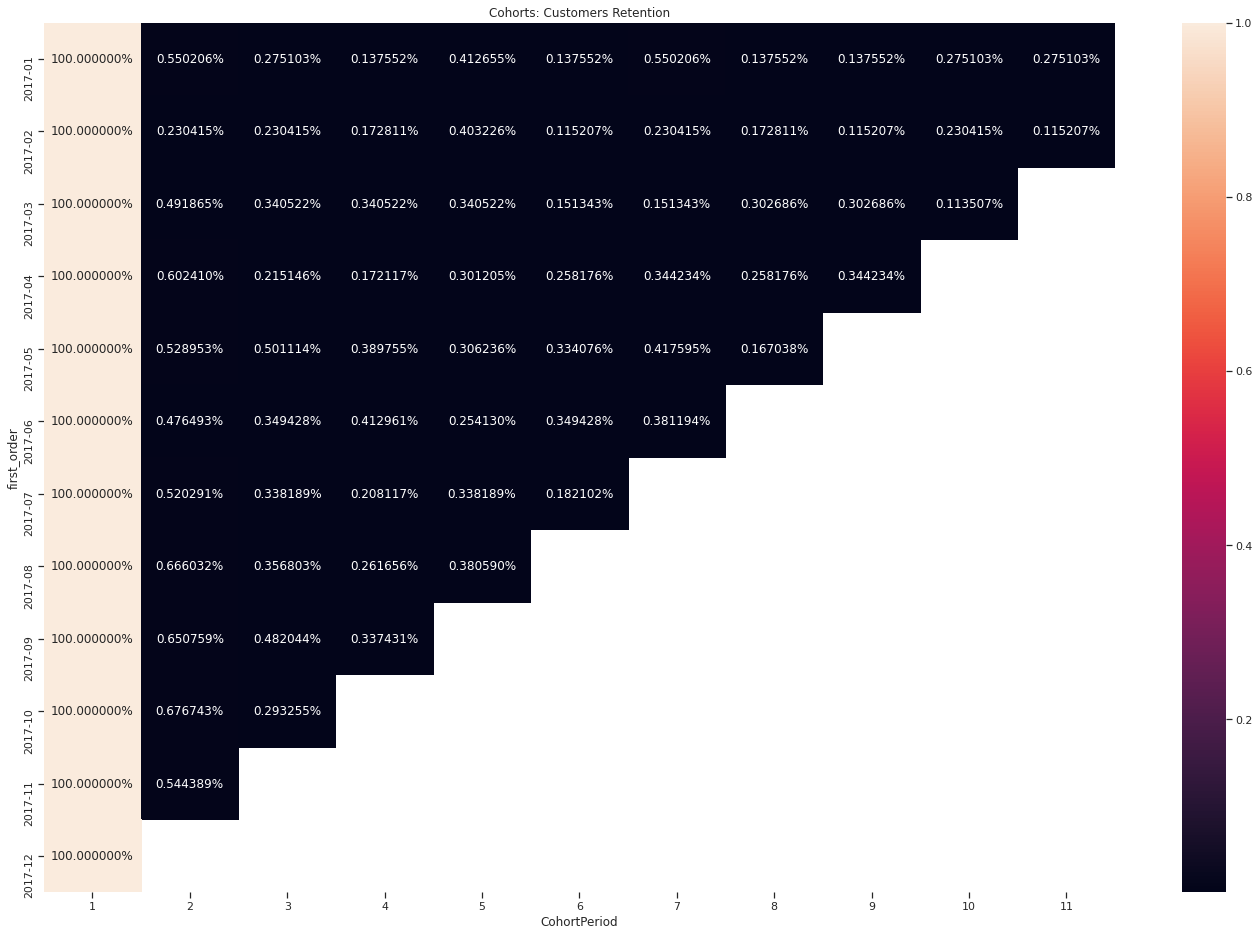

In [183]:
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: Customers Retention')
sns.heatmap(customers_retention.T, mask=customers_retention.T.isnull(), annot=True, fmt= '0%')

*Периодом для расчетов я взяла 2017 год, так как у нас есть данные за все 12 месяцев за этот период. За когорту я брала период 
равный месяцу покупки этого года.За покупку я считала все заказы с наличием данных в колонке 'order_approved_at', так как 
это означает, что деньги за товар были получены. Сначала вывела колонку с датами первых покупок по каждому клиенту. Далее 
определила количество покупок по количеству элементов в одном периоде и количество уникальных клиентов. Чтобы упорядочить 
данные добавила порядковое значение для каждого из периодов начинающийся с 1. Чтобы посмотреть как меняется процент возврата 
в каждой группе, создала ряд содержащий размер каждой когорты и размер ряда. Затем разделила количетсво покупателей в каждом 
периоде на размер каждой когорты. В результирующей таблице мы видим что когорта с самым высоким retention на 3й месяц это 
когорта за май 2017 года. Ретеншн составил 0,5%. Для наглядности визуализоровала данные в красивую табличку с показателями 
процентов. Мы видим что retention в целом очень низкий. Большая часть клиентов делают покупки в этом магазине только один раз.*

#### 6. Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

In [184]:
merge_orders_and_customers_and_items = merge_orders_and_customers.merge(order_items, on = 'order_id')

In [185]:
merge_orders_and_customers_and_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017.0,10.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018.0,7.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018.0,8.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017.0,11.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018.0,2.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018.0,2.0,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017.0,8.0,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018.0,1.0,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018.0,1.0,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [186]:
orders_and_products = merge_orders_and_customers_and_items.groupby(
    ["order_id", "product_id"], as_index=False
).agg({"price": "sum"})

In [187]:
orders_and_products = (
    orders_and_products.groupby("order_id", as_index=False)
    .agg({"product_id": "count", "price": "sum"})
    .sort_values("price")
)

In [188]:
orders_and_products

,order_id,product_id,price
42562,6e864b3f0ec71031117ad4cf46b7f2a1,1,0.85
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,0.85
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,2.20
89758,e8bbc1d69fee39eee4c72cb5c969e39d,1,2.29
21805,38bcb524e1c38c2c1b60600a80fc8999,1,2.90
...,...,...,...
94439,f5136e38d1a14a4dbd87dff67da82701,1,6499.00
98298,fefacc66af859508bf1a7934eab1e97f,1,6729.00
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6735.00
44467,736e1922ae60d0d6a89247b851902527,1,7160.00


In [189]:
orders_and_prices = orders_and_products.merge(merge_orders_and_customers, on = 'order_id')

In [190]:
orders_and_prices.sort_values('order_approved_at',ascending = False)

,order_id,product_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
72211,54282e97f61c23b78330c15b154c867d,1,145.00,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,ff22e30958c13ffe219db7d711e8f564,2989,sao paulo,SP,2018.0,9.0
48681,35a972d7f8436f405b56e36add1a7140,1,84.99,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,24ac2b4327e25baf39f2119e4228976a,13483,limeira,SP,2018.0,8.0
9135,03ef5dedbe7492bdae72eec50764c43f,1,24.90,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP,2018.0,8.0
93988,0b223d92c27432930dfe407c6aea3041,1,418.00,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,2018.0,8.0
24530,168626408cb32af0ffaf76711caae1dc,1,45.90,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,2018.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69056,3c0b8706b065f9919d0505d3b3343881,1,133.99,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,NaN,NaN
69464,2eecb0d85f281280f79fa00f9cec1a95,1,135.00,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,NaN,NaN
73333,d69e5d356402adc8cf17e08b5033acfb,1,149.80,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,NaN,NaN
90820,e04abd8149ef81b95221e88f6ed9ab6a,1,309.90,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,NaN,NaN


In [191]:
now = dt.datetime(2018,9,3)

In [192]:
orders_and_prices = orders_and_prices.query("order_status !=['created', 'cancelled']")

In [193]:
RFM_table=orders_and_prices.groupby('customer_unique_id').agg({'order_approved_at': lambda x: (now - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'price': lambda x: x.sum()})

In [194]:
RFM_table

,order_approved_at,order_id,price
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90
0000f46a3911fa3c0805444483337064,541.0,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99
0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00
fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89
ffff371b4d645b6ecea244b27531430a,572.0,1,89.90


In [195]:
RFM_table.rename(
    columns={
        "order_approved_at": "recency",
        "order_id": "frequency",
        "price": "monetary_value",
    },
    inplace=True,
)

In [196]:
RFM_table.sort_values('frequency')

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90
a930016dbc02c5ec1f9703a25414aabb,22.0,1,69.90
a92f6790027e4cb823b2a1423382433d,212.0,1,22.90
a92e7739404584bb3dab2a0cfb386117,477.0,1,65.00
a92e1b33fc90178753e232b12bfc1667,489.0,1,49.80
...,...,...,...
1b6c7548a2a1f9037c1fd3ddfed95f33,199.0,7,809.21
6469f99c1f9dfae7733b25662e7f1782,66.0,7,664.20
ca77025e7201e3b30c44b472ff346268,92.0,7,806.61


In [197]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,118.0,1.0,47.9
0.50,222.0,1.0,89.9
0.75,351.0,1.0,155.0


In [198]:
quantiles = quantiles.to_dict()
RFM_Segment = RFM_table.copy()


def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


RFM_Segment["R_Quartile"] = RFM_Segment["recency"].apply(
    R_Class,
    args=(
        "recency",
        quantiles,
    ),
)
RFM_Segment["F_Quartile"] = RFM_Segment["frequency"].apply(
    FM_Class,
    args=(
        "frequency",
        quantiles,
    ),
)
RFM_Segment["M_Quartile"] = RFM_Segment["monetary_value"].apply(
    FM_Class,
    args=(
        "monetary_value",
        quantiles,
    ),
)
RFM_Segment["RFMClass"] = (
    RFM_Segment.R_Quartile.map(str)
    + RFM_Segment.F_Quartile.map(str)
    + RFM_Segment.M_Quartile.map(str)
)

In [104]:
RFM_Segment

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00,1,1,4,114
fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89,2,1,2,212
ffff371b4d645b6ecea244b27531430a,572.0,1,89.90,1,1,2,112


In [105]:
RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
3f4f614c632af7fc7508462a7cb55ac2,698.0,1,9.90,1,1,1,111
87776adb449c551e74c13fc34f036105,698.0,1,29.99,1,1,1,111
14359ea0c7a105749c0a56478825b015,698.0,1,32.49,1,1,1,111
b8b8726af116a5cfb35b0315ecef9172,698.0,1,21.50,1,1,1,111
f176923a0a4ab546c7287791ccb82193,698.0,1,47.80,1,1,1,111


In [106]:
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
d052fe86655dae0e952c1bacbbb99d7a,118.0,2,169.89,4,4,4,444
ea09b32bf96ba057088e140c6bec60da,118.0,2,368.90,4,4,4,444
e3c95cff4b8cca496061b369eaa006f7,118.0,2,294.99,4,4,4,444
d21fb1e8aee69c608f5c2fb5b6c28cad,118.0,2,166.95,4,4,4,444
6a583f4c6790a4c8330beb7612e17f42,118.0,2,161.70,4,4,4,444


*За покупку считала все заказы кроме тех у кого стоит статус 'cancelled' и 'created'. Датой покупки считала дату 
'order_approved_at'. В описании сказано что 'order_approved_at' это время подтверждения оплаты заказа, поэтому заказы с датами
в этой колонке считаю купленными, кроме тех которые потом закэнселили, так как там должен был быть возврат средств, либо в 
статусе created так как до оплаты этот заказ не дошел.
Сначала из имеющихся таблиц я получила метрики которые нужны анализа. Recency - это колисчетво дней от последней покупки до 
текущей даты. За текущую дату взяла последнюю дату покупки в датафреме. Так же посчитала все покупки для каждого 
'customer_unique_id' получив frequency и суммировала стоимость всех покупок получив monetary_value. Получила таблицу RFM_table
Я разделила получившиеся данные на кластеры по квартилям, потому что квартили удобно делят данные на понятные равные сегменты 
(0.25, 0.5, 0.75).
Далее для простоты исследования данных я пронумеровала каждый сегмент от 1 до 4, где 1 это самый низкий показатель, а 4 
самый высокий. Так же создала отдельную колонку 'RFMClass' которая показывает сразу все показалтели. Теперь мы можем оценивать
покупателей сортируя таблицу по  сегментам - квартилям. Можно отсортировать талицу только по одному показателю, например
M_Quartile == 4 и увидеть только покупателей с самой высокой суммой за все покупки (0,75 процентиль). Так же можно 
отсортироватт таблицу по значениям колонке  'RFMClass'. Например отсортировать RFMClass == '444' мы увидим только самых
лояльных клиентов, которые покупают чаще всего и на самые большие суммы.*